<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sieć-klasyfikująca-RBF" data-toc-modified-id="Sieć-klasyfikująca-RBF-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sieć klasyfikująca RBF</a></span><ul class="toc-item"><li><span><a href="#Neuron-RBF" data-toc-modified-id="Neuron-RBF-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Neuron RBF</a></span></li><li><span><a href="#Wizualizacja-funkcji-RBF" data-toc-modified-id="Wizualizacja-funkcji-RBF-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Wizualizacja funkcji RBF</a></span></li><li><span><a href="#Wielowymiarowa-funkcja-RBF" data-toc-modified-id="Wielowymiarowa-funkcja-RBF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Wielowymiarowa funkcja RBF</a></span></li><li><span><a href="#Przykładowy-zbiór-danych-2D" data-toc-modified-id="Przykładowy-zbiór-danych-2D-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Przykładowy zbiór danych 2D</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie:-implementacja-sieci-RBF-do-klasyfikacji" data-toc-modified-id="Ćwiczenie:-implementacja-sieci-RBF-do-klasyfikacji-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ćwiczenie: implementacja sieci RBF do klasyfikacji</a></span></li><li><span><a href="#Test-metody-init_centers()" data-toc-modified-id="Test-metody-init_centers()-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Test metody init_centers()</a></span></li><li><span><a href="#Test-metody-hidden_activation()" data-toc-modified-id="Test-metody-hidden_activation()-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Test metody hidden_activation()</a></span></li></ul></li><li><span><a href="#Test-metody-fit()" data-toc-modified-id="Test-metody-fit()-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Test metody fit()</a></span></li><li><span><a href="#Granica-decyzyjna" data-toc-modified-id="Granica-decyzyjna-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Granica decyzyjna</a></span></li><li><span><a href="#Wagi-sieci" data-toc-modified-id="Wagi-sieci-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Wagi sieci</a></span></li><li><span><a href="#Wizualizacja-wyjść-sieci" data-toc-modified-id="Wizualizacja-wyjść-sieci-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Wizualizacja wyjść sieci</a></span></li><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Ćwiczenie</a></span></li><li><span><a href="#Zadanie:-Klasyfikator-RBF-dla-danych-digits" data-toc-modified-id="Zadanie:-Klasyfikator-RBF-dla-danych-digits-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Zadanie: Klasyfikator RBF dla danych digits</a></span></li></ul></li></ul></div>

# Sieć klasyfikująca RBF


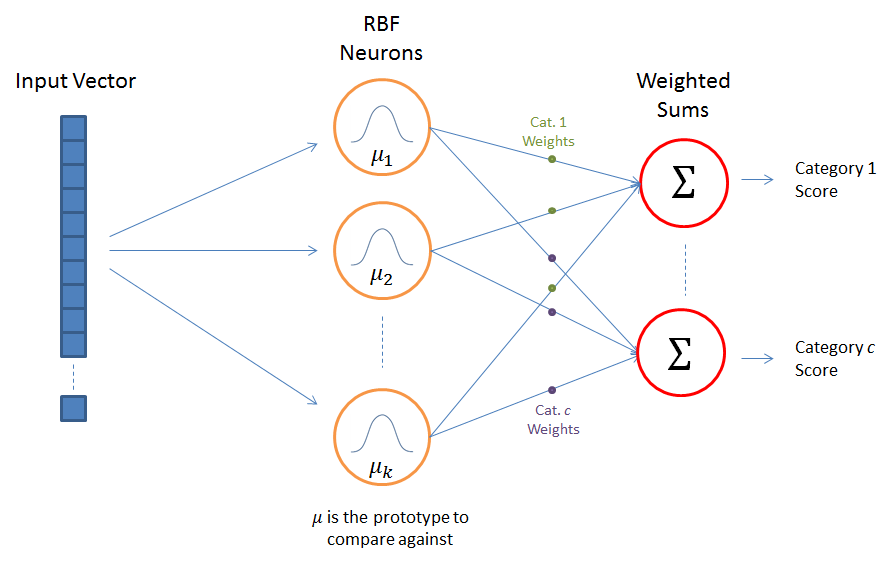



## Neuron RBF

* neuron reprezentuje prototyp
* poziom aktywacji zalezy od odległości od centrum funnkcji RBF
* funkcja Gaussa

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
$$
* funkcja aktywacji RBF
$$
\varphi(x)=e^{-\beta\|x-\mu\|^2} \qquad \text{gdzie} \qquad \beta=\frac{1}{2\sigma^2}
$$

In [14]:
import numpy as np

def gauss(x, center, sigma=1.0):

    betas =  1.0 / (2.0 * sigma**2)
    diffs = x - center
    dist = np.sum(diffs**2, axis=1)
    z = np.exp(-betas * dist)

    return z

## Wizualizacja funkcji RBF

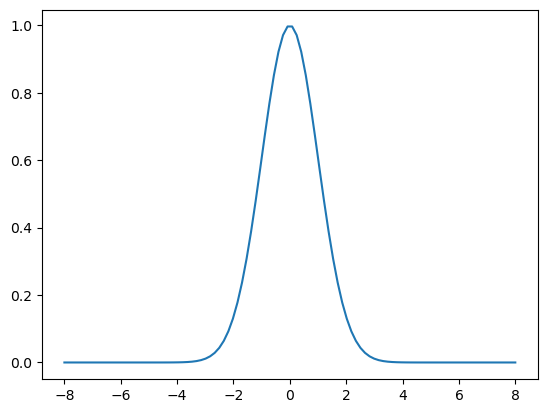

In [18]:
import matplotlib.pyplot as plt

x = np.linspace(-8, 8, 100).reshape([100, 1])
y = gauss(x, center=0, sigma=1)

plt.plot(x, y, label='sigma=%.1f' % sigma)
plt.show()

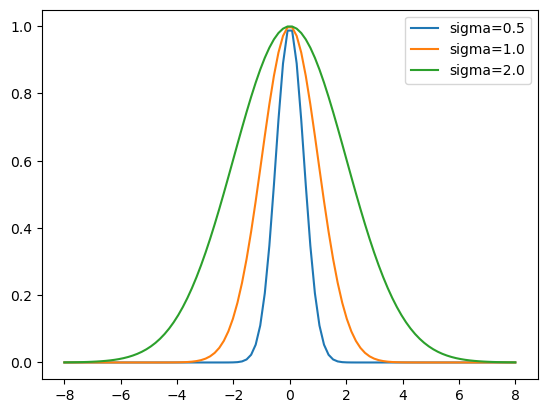

In [19]:
x = np.linspace(-8, 8, 100).reshape([100, 1])

for sigma in (0.5, 1.0, 2.0):
    y = gauss(x, center=0, sigma=sigma)
    plt.plot(x, y, label='sigma=%.1f' % sigma)
plt.legend()
plt.show()

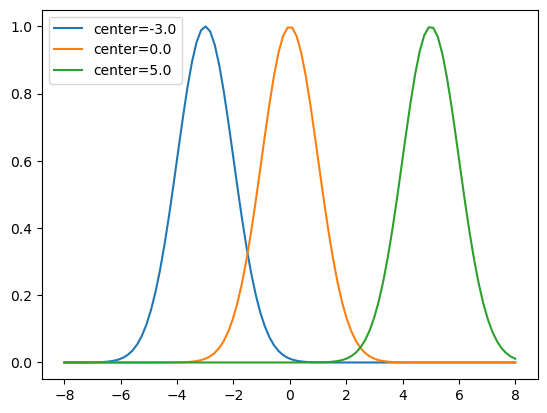

In [20]:
x = np.linspace(-8, 8, 100).reshape([100, 1])

for center in (-3, 0.0, 5.0):
    y = gauss(x, center=center, sigma=1.0)
    plt.plot(x, y, label='center=%.1f' % center)
plt.legend()
plt.show()

## Wielowymiarowa funkcja RBF





In [39]:
x = np.array(
    [ 
        [ 1, 2  ], 
        [ -5, 0 ] 
    ])
center = np.array([ 1, 1])
sigma =1
gauss(x, center, sigma)

array([6.06530660e-01, 9.23744966e-09])

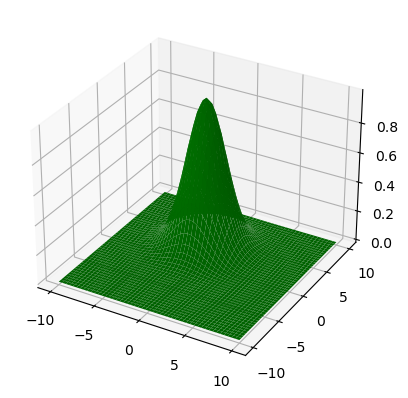

In [42]:
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
x_flat, y_flat = x.ravel(), y.ravel()
xy = np.array( [x_flat, y_flat] ).T

center = np.array([-1.0, 3.0])
z_flat = gauss(xy, center, sigma=2)

z = z_flat.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x, y, z, color ='green')
plt.show()

## Przykładowy zbiór danych 2D

* plik [dane/dataser.csv](dane/dataser.csv)
* dane pochodzą z kursu uczenia maszynowego Andrew Ng’s na Coursera [Supervised Machine Learning: Regression and Classification](https://www.coursera.org/learn/machine-learning)

Ilosc przypadkow:  863
Ilośc zmienneych:  2
Liczebnośc klas:  [383 480]


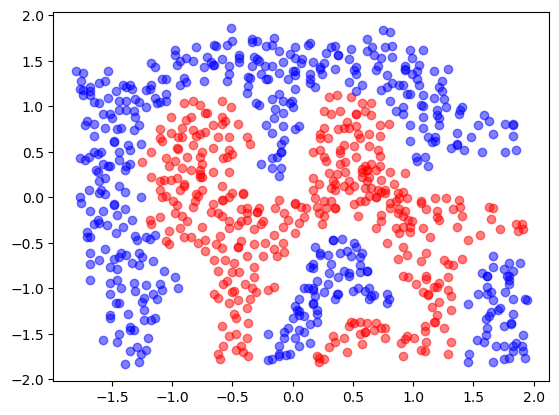

In [53]:
import matplotlib.pyplot as plt

data = np.loadtxt('dane/dataset.csv',  delimiter=',')

X = data[:, :2]
y = data[:, 2] - 1 

print('Ilosc przypadkow: ', X.shape[0])
print('Ilośc zmienneych: ', X.shape[1])
print('Liczebnośc klas: ' ,  str(np.bincount(y.astype(int))))

plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5)
plt.show()

### Ćwiczenie: implementacja sieci RBF do klasyfikacji

Zaimplementuj klasyfikator RBF korzystając z poniższego szablonu klasy [RBFClassifier.py](RBFClassifier.py)  

Parametry konstruktora: 
  * ``n_hidden`` liczba neuronów warstwy ukrytej 
  * ``sigma`` wartość rozmycia funkcji radialnych
  
**Algorytm uczenia**:
1. Ustalenie centrów funkcji radialnych (metoda ``init_centers(X,y)``).   
Jako centra wybieramy ``n_hidden`` losowych wektorów treningowych.
2. Ustalenie rozmyć funkcji radialnych (metoda ``init_sigmas(X, y)``).  
Dla każdej funkcji radialnej używamy stałego rozmycia ``sigma``.
3. Uczenie wag warstwy wyjsciowej (metoda ``update_weights(X, y)``).  
Wagi i wyrazy wolne ustalone na podstawie rozwiązania układu równań $\mathbf{W}\mathbf{Z} + \mathbf{b}= \mathbf{y}$, gdzie $\mathbf{Z}$ to macierz aktywacji warstwy ukrytej dla zbioru $\mathbf{X}$.  
Stąd:

$$ \mathbf{W}' = \left( \mathbf{Z}'^T \mathbf{Z'}\right)^{-1}\mathbf{Z'}\mathbf{y} $$
gdzie $\mathbf{W}'$ jest macierzą $\mathbf{W}$ rozszerzoną o wektor $\mathbf{b}$, a macierz $\mathbf{Z}'$ jest macierzą $\mathbf{Z}$ rozszerzoną o wektor jednostkowy.

**Zaimplementuj brakujące metody:**
  * ``init_centers(X, y)`` ustala ``n_hidden`` losowych prototypów w macierzy ``centers``
  * ``init_sigmas(X, y)`` ustala dla każdej funkcji radialnej rozmycie ``sigma``
  * ``update_weights(X, y)`` ustala macierz wag $\mathbf{W}$ oraz wektor wyrazów wolnych $\mathbf{b}$ nauronów wyjściowych.
  * ``hidden_activation(X)`` zwraca aktywację warstwy ukrytej
  * ``output_activation(X)`` zwraca aktywację warstwy wyjściowej

In [58]:
from sklearn.base import BaseEstimator

class RBFClassifier(BaseEstimator):
    
    def __init__(self, n_hidden=10, sigma=1):
        
        self.sigma = sigma
        self.n_hidden = n_hidden   

    def init_centers(self, X, y):
        # ustaw pozycje centrow, macierz o kształscie [ n_hidden, X.shape[1]]

        return self

    def init_sigmas(self, X, y):
        # ustaw rozycia dla funkcji radialnych, wektor o długości [ n_hidden ]

        return self

    def update_weights(self, X, y):
        # ustaw macierz wag W i wektor wyrazów wolbych b dla warstwy wyjściowej
        # macierz W o kształcie [n_hidden, n_outputs], wektor b o długości [n_outputs]

        return self

    def hidden_activation(self, X):
        # zwraca macierz aktywacji warstwy ukrytej, macierz o kształcie [X.shape[0], n_hidden]

        return 

    def output_activation(self, X):
        # zwraca macierz aktywacji warstwy wyjściowj, macierz o kształcie [X.shape[0], n_outputs]

        return 

    def fit(self, X, y):
        self.init_centers(X, y)
        self.init_sigmas(X, y)
        self.update_weights(X, y)
        return self

    def predict(self, X):
        return self.output_activation(X).argmax(axis=1)

    def score(self, X, y):
        return (self.predict(X) == y).mean()

In [109]:
### Rozwiazanie
from sklearn.preprocessing import OneHotEncoder

class RBF1(RBFClassifier):
    
    def init_centers(self, X, y):
        
        rand_ind = np.random.permutation(X.shape[0])[:self.n_hidden]
        self.centers = X[rand_ind]
        return self
    
    def init_sigmas(self, X, y):

        self.sigmas = np.ones((self.n_hidden, 1)) * self.sigma
        return self
    
    def hidden_activation(self, X):

        activations = []
        for centers, sigma in zip(self.centers, self.sigmas):
            activations.append(gauss(X, centers, sigma))
        return np.vstack(activations).T
    
    def update_weights(self, X, y):

        y_one = OneHotEncoder().fit_transform(y[:, np.newaxis]).toarray()
        act = self.hidden_activation(X)
        act = np.hstack([np.ones([X.shape[0], 1]), act])

        self.theta = np.linalg.pinv(act.T @ act) @ act.T @ y_one
        self.W = self.theta[1:, :]
        self.b = self.theta[0, :]
        return self
    
    def output_activation(self, X):

        act = self.hidden_activation(X)
        return act @ self.W + self.b

### Test metody init_centers()




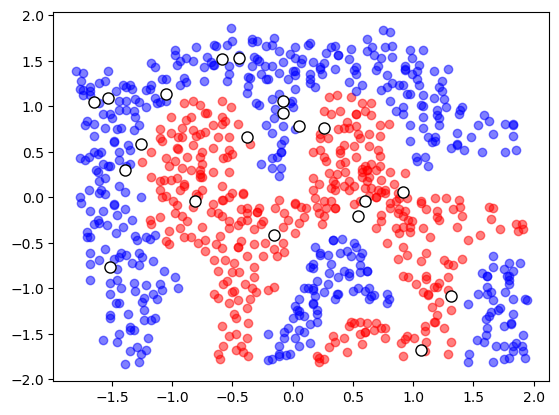

[[-0.44177931  1.52912613]
 [ 0.6018578  -0.04332101]
 [ 0.91494894  0.05954936]
 [-0.59087033  1.51443036]
 [-0.38214291  0.66207584]
 [-1.64941655  1.04416579]
 [-1.39596182  0.29468164]
 [-1.53014374  1.0882531 ]
 [ 1.31749468 -1.08672051]
 [-1.51523463 -0.76341363]
 [ 0.25894846  0.76494621]
 [-0.08396087  1.05886156]
 [-0.08396087  0.92659965]
 [-1.05305248  1.1323404 ]
 [ 0.5422214  -0.20497446]
 [ 0.05022104  0.77964198]
 [-0.15850638 -0.4107152 ]
 [-1.26177991  0.588597  ]
 [ 1.06403995 -1.67455122]
 [-0.81450686 -0.04332101]]


In [148]:
rbf1 = RBF1(n_hidden=20, sigma=1)
rbf1.init_centers(X, y)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5)
plt.plot(rbf1.centers[:, 0], rbf1.centers[:, 1], 'ok', mfc='w', markersize=8)
plt.show()
print(rbf1.centers)

### Test metody hidden_activation()

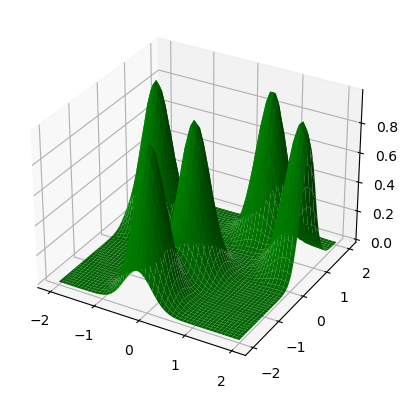

In [107]:
rbf1 = RBF1(n_hidden=5, sigma=0.3)
rbf1.init_centers(X, y)
rbf1.init_sigmas(X, y)

x1, y1 = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
xy1 = np.array( [x1.ravel(), y1.ravel()] ).T

z_flat = rbf1.hidden_activation(xy1)
z_flat = z_flat.sum(axis=1)   # suma funkcji RBF
z = z_flat.reshape(x1.shape)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x1, y1, z, color ='green')
plt.show()

## Test metody fit()

In [177]:
rbf1 = RBF1(n_hidden=20, sigma=1)
rbf1.fit(X, y)
print('Poprawność trening: ', rbf1.score(X, y))

Poprawność trening:  0.8945538818076477


## Granica decyzyjna

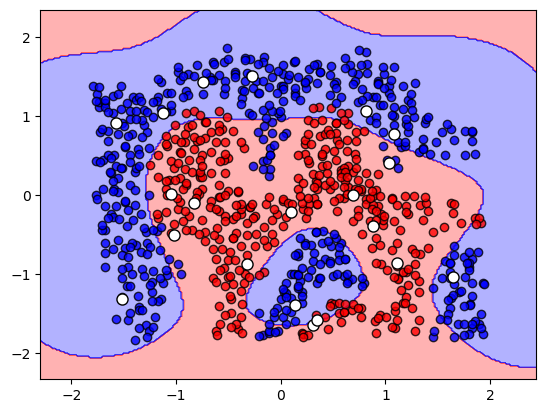

In [178]:
from utils import plot_decision_regions

rbf1 = RBF1(n_hidden=20, sigma=1)
rbf1.fit(X, y)

plot_decision_regions(X, y, rbf1)
plt.plot(rbf1.centers[:, 0], rbf1.centers[:, 1], 'ok', mfc='w', markersize=8)
plt.show()

## Wagi sieci 

In [165]:
print('W=\n', rbf1.W)
print('b=\n', rbf1.b)

W=
 [[  35.33584432  -35.33584432]
 [-103.71167284  103.71167284]
 [ -25.70186561   25.70186561]
 [ 100.43496345 -100.43496345]
 [-181.00501762  181.00501762]
 [  39.98129658  -39.98129658]
 [  83.30802845  -83.30802845]
 [  -6.83503435    6.83503435]
 [  44.30371697  -44.30371697]
 [  20.17873875  -20.17873875]
 [  -0.88554252    0.88554252]
 [  -6.75132542    6.75132542]
 [ -22.23294491   22.23294491]
 [   7.75766314   -7.75766314]
 [  -3.65472512    3.65472512]
 [-118.84865739  118.84865739]
 [   2.07763087   -2.07763087]
 [ 120.72406752 -120.72406752]
 [  14.28797882  -14.28797882]
 [  -3.46473073    3.46473073]]
b=
 [ 1.25961007 -0.25961007]


## Wizualizacja wyjść sieci

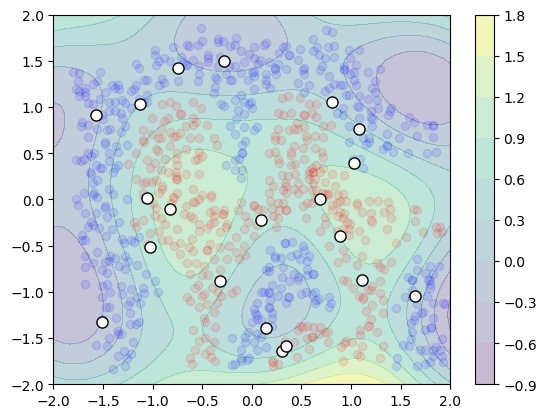

In [202]:
x1, y1 = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
xy1 = np.array( [x1.ravel(), y1.ravel()] ).T

Z_flat = rbf1.output_activation(xy1)

output=0   # output=1 jest symetryczny
Z1 = Z_flat[:, output].reshape(x1.shape)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.1)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.1)
plt.contourf(x1, y1, Z1, alpha=0.3)
plt.plot(rbf1.centers[:, 0], rbf1.centers[:, 1], 'ok', mfc='w', markersize=8)
plt.colorbar()
plt.show()

## Ćwiczenie

Sprawdź wpływ ustawień sieci na jakość uzyskiwanych wyników:

* **n_hidden**: porównaj wynika dla liczby funkcji radialnych od 2 do 1000 przy ustalonej wartości ``sigma=1`` 
* **sigma**: porównaj wyniki dla róznych wartości rozmycia od bardzo małych (0.01) do dużych (2.0) przy ustalonej liczbie neuronów ukrytych 

Ocenę jakości modelu wykonaj z użyciem walidacji krzyżowej (np. za pomoca przeszukiwania siatką ``GridSearchCV``)

Największa poprawność: 0.976
Najlepszy zestaw parametrów: {'n_hidden': 500}


RBF1(n_hidden=500)

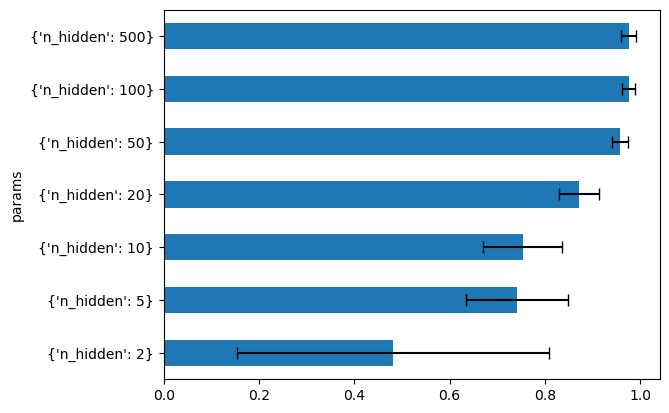

In [173]:
from sklearn.model_selection import GridSearchCV

## Rozwiązanie

import pandas as pd
parameters = {'n_hidden': (2, 5, 10, 20, 50, 100, 500)}
rbfn = RBF1(sigma=1)
gs = GridSearchCV(rbfn, parameters, cv=10)
gs.fit(X, y)
# print(pd.DataFrame(clf.cv_results_).to_string())

print('Największa poprawność: %.3f' % gs.best_score_)
print('Najlepszy zestaw parametrów: %s' % str(gs.best_params_))
display(gs.best_estimator_)
df = pd.DataFrame(gs.cv_results_)
df.plot.barh(x='params', y='mean_test_score', xerr='std_test_score',  capsize=4, legend=False);

Największa poprawność: 0.988
Najlepszy zestaw parametrów: {'sigma': 0.5}


RBF1(n_hidden=100, sigma=0.5)

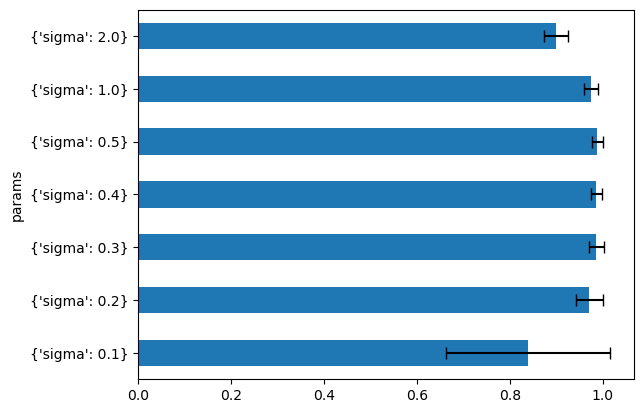

In [176]:
# Rozwiązanie

import pandas as pd
parameters = {'sigma': (0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0)}
rbfn = RBF1(n_hidden=100)
gs = GridSearchCV(rbfn, parameters, cv=10)
gs.fit(X, y)
# print(pd.DataFrame(clf.cv_results_).to_string())

print('Największa poprawność: %.3f' % gs.best_score_)
print('Najlepszy zestaw parametrów: %s' % str(gs.best_params_))
display(gs.best_estimator_)
df = pd.DataFrame(gs.cv_results_)
df.plot.barh(x='params', y='mean_test_score', xerr='std_test_score',  capsize=4, legend=False);

## Zadanie: Klasyfikator RBF dla danych digits


Zaimplementuj sieć RBF do zadań klasyfikacji posiadającą następujący algorytm uczenia: 
 
1. Ustalenie centrów funkcji radialnych (metoda ``init_centers(X,y)``).   
Centra funkcji radialnych ustalane są metodą k-średnich. W tym celu można skorzystać z algorytmu [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
2. Ustalenie rozmyć funkcji radialnych (metoda ``init_sigmas(X, y)``).  
Wartość rozmycia $\sigma_k$ dla każdej funkcji radialnej jest dobierana jako średnia odległość między wektorami treningowymi związanymi z centrum $k$
$$
\sigma_k=\frac{1}{m} \sum_{i=1}^m\left\|x_i-\mu_k\right\|
$$
Wskazówka: 1) metoda ``predict(X)`` klasy ``KMeans`` zwraca wektor określający przynajeżlość do centrów. 2) funkcja [scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) oblicza odlegóści między wierszami macierzy.
3. Uczenie wag warstwy wyjsciowej (metoda ``update_weights(X, y)``).  
Wagi i wyrazy wolne ustalone na podstawie rozwiązania układu równań $\mathbf{W}\mathbf{Z} + \mathbf{b}= \mathbf{y}$.

$$ \mathbf{W}' = \left( \mathbf{Z}'^T \mathbf{Z'}\right)^{-1}\mathbf{Z'}\mathbf{y} $$


Zastosuj zaimplementowanegy algorytmu RBF do klasyfikacji zbioru danych ``digits`` (zob. [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

```python
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
```
Znajdź najskuteczniejszy model dobierając odpowiednią ilość neuronów ukrytych. Ocenę modelu wykonaj za pomoca walidacji krzyżowej (np. za pomoca przeszukiwania siatką ``GridSearchCV``). 

In [217]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [221]:
y

array([0, 1, 2, ..., 8, 9, 8])

Acc =  0.998330550918197
Największa poprawność: 0.971
Najlepszy zestaw parametrów: {'n_hidden': 400, 'sigma': 3.0}


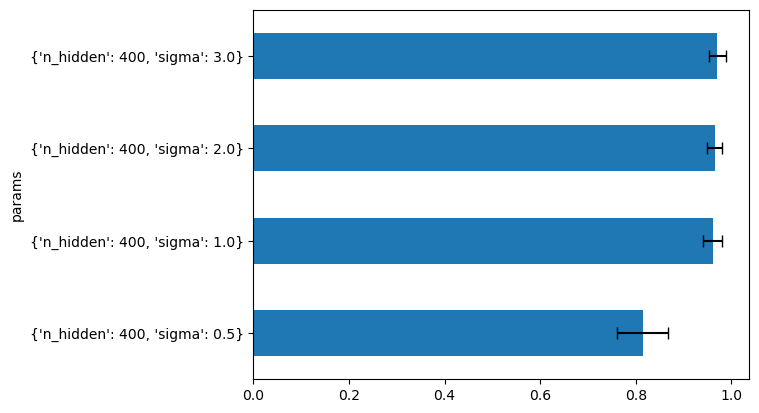

In [216]:
N, w, h = digits.images.shape
d = w * h # number of pixels
c = len(digits.target_names)
X = digits.images.reshape((N, d))
X = X/ 16.0 - 0.5

## GV gris search
from sklearn.model_selection import GridSearchCV
parameters = {'n_hidden': (400, ), 'sigma' : ( .5, 1.0, 2.0, 3.0) }
rbfn = RBF1()
gs = GridSearchCV(rbfn, parameters)
gs.fit(X, y)
# print(pd.DataFrame(gs.cv_results_).to_string())
rbfn = gs.best_estimator_

# # accuracy on train data
#
print('Acc = ', rbfn.score(X, y))
#
print('Największa poprawność: %.3f' % gs.best_score_)
print('Najlepszy zestaw parametrów: %s' % str(gs.best_params_))
df = pd.DataFrame(gs.cv_results_)
df.plot.barh(x='params', y='mean_test_score', xerr='std_test_score',  capsize=4, legend=False);
plt.show()

In [208]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])